In [9]:
import os
import h5py
import nibabel as nib

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive

def fetch_file(pattern=""):
    path = os.getcwd() + '/model/h5df_data/'
    _, _, files = next(os.walk(path))
    result = []
    for file in files:
        if pattern in file:
            result.append(h5py.File(path+file, 'r'))
    return result


def show_image(images):
    # show image with [None, None, : ,: ,:] dimension
    def show_frame(id):
        length = len(images)
        for i in range(length):
            ax = plt.subplot(1, length, i+1)
            plt.imshow(images[i][id, :, :], cmap='gray')
    interact(show_frame, 
             id=widgets.IntSlider(min=0, max=images[0].shape[0]-1, step=1, value=images[0].shape[0]/2))


In [15]:
files = fetch_file("pad_data_T1_preprocessed")
print(files)
for i in files[0]:
    print(i, files[0][i])

show_image(files[0]["(192, 512, 512)"])

[<HDF5 file "pad_data_T1_preprocessed.h5" (mode r)>]
(128, 256, 256) <HDF5 dataset "(128, 256, 256)": shape (5, 128, 256, 256), type "<f8">
(192, 512, 512) <HDF5 dataset "(192, 512, 512)": shape (5, 192, 512, 512), type "<f8">
(320, 384, 384) <HDF5 dataset "(320, 384, 384)": shape (5, 320, 384, 384), type "<f8">
patch_size <HDF5 dataset "patch_size": shape (3,), type "<i8">


interactive(children=(IntSlider(value=96, description='id', max=191), Output()), _dom_classes=('widget-interac…

In [16]:
files = fetch_file("pad_data_T2_preprocessed")
# print(files)
# for i in files[0]:
#     print(i, files[0][i])

show_image(files[0]["(192, 512, 512)"])

interactive(children=(IntSlider(value=96, description='id', max=191), Output()), _dom_classes=('widget-interac…

In [18]:
files = fetch_file("pad_data_FLAIR")
# print(files)
# for i in files[0]:
#     print(i, files[0][i])

show_image(files[0]["(192, 512, 512)"])


interactive(children=(IntSlider(value=96, description='id', max=191), Output()), _dom_classes=('widget-interac…

In [19]:
files = fetch_file("pad_target_data")
print(files)
for i in files[0]:
    print(i, files[0][i])
show_image(files[0]["(192, 512, 512)"])


[<HDF5 file "pad_target_data.h5" (mode r)>]
(128, 256, 256) <HDF5 dataset "(128, 256, 256)": shape (5, 128, 256, 256), type "<f8">
(192, 512, 512) <HDF5 dataset "(192, 512, 512)": shape (5, 192, 512, 512), type "<f8">
(320, 384, 384) <HDF5 dataset "(320, 384, 384)": shape (5, 320, 384, 384), type "<f8">
patch_size <HDF5 dataset "patch_size": shape (3,), type "<i8">


interactive(children=(IntSlider(value=96, description='id', max=191), Output()), _dom_classes=('widget-interac…

In [ ]:
from model.data import *
from model.generator import *


config = {}
config["patch_size"] = (64, 64, 64)  # switch to None to train on the whole image
config["patch_gap"] = 16
config["batch_size"] = 2
config["kfold"] = 5

d = Data()
d.load_data(config["patch_size"])

# prepare data for training
train_num, valid_num = d.prekfold(config["patch_size"], config["patch_gap"], config["batch_size"], config["kfold"])
train_generator = DataGenerator(d.data, d.patch_index, d.kfold, d.batch_size,
                                d.patch_size, d.patch_gap, d.valid_index, True)
valid_generator = DataGenerator(d.data, d.patch_index, d.kfold, d.batch_size,
                                d.patch_size, d.patch_gap, d.valid_index, False)
train_generator.set_index(0)
valid_generator.set_index(0)

Using TensorFlow backend.


In [2]:
print(d.patch_index)
# for i, j in d.patch_index.items():
#     print(i, j.shape)
#     print(d.patch_index[i].shape[0])

defaultdict(<class 'list'>, {'(128, 256, 256)': array([[[ 16, 128,  32,   0],
        [ 32,  16,  32,   0],
        [ 32,  96,  48,   0],
        ...,
        [ 16, 144,  48,   0],
        [ 16, 176,  16,   0],
        [  0, 160,  64,   0]],

       [[ 48,  32,  80,   0],
        [ 32, 176, 128,   1],
        [  0,   0, 112,   0],
        ...,
        [ 48,  48, 176,   0],
        [ 32,  80,  16,   0],
        [ 32,  80,   0,   0]],

       [[  0,  80, 176,   1],
        [ 16,  32, 128,   1],
        [ 32,  32, 160,   1],
        ...,
        [ 16,  16,  16,   0],
        [ 16,  80,  96,   1],
        [  0, 128,  80,   1]],

       [[ 32, 112, 176,   1],
        [ 32, 128, 160,   1],
        [ 16, 112, 144,   1],
        ...,
        [ 16, 112, 128,   1],
        [ 16,  80,  96,   1],
        [ 48,  80, 128,   1]],

       [[ 16,   0,  48,   0],
        [ 16,  48,  64,   0],
        [ 32, 144,  80,   1],
        ...,
        [  0, 128,  96,   1],
        [ 16, 144,  48,   0],
        [

(2, 1, 64, 64, 64) (2, 1, 64, 64, 64)


interactive(children=(IntSlider(value=0, description='id', max=0), Output()), _dom_classes=('widget-interact',…

1045.0


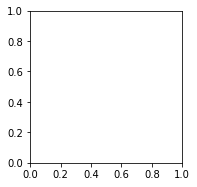

In [4]:
import os
import h5py
import nibabel as nib

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive

def fetch_file(pattern=""):
    path = os.getcwd() + '/model/h5df_data/'
    _, _, files = next(os.walk(path))
    result = []
    for file in files:
        if pattern in file:
            result.append(h5py.File(path+file, 'r'))
    return result


def show_image(images):
    # show image with [None, None, : ,: ,:] dimension
    def show_frame(id):
        length = len(images)
        for i in range(length):
            ax = plt.subplot(1, length, i+1)
            plt.imshow(images[i][id, :, :], cmap='gray')
    interact(show_frame, 
             id=widgets.IntSlider(min=0, max=images[0].shape[0]-1, step=1, value=images[0].shape[0]/2))



i = 5
inputs = train_generator[i][0]

target = train_generator[i][1]
print(inputs.shape, target.shape)
show_image(inputs[0])
print(np.sum(target[0]))
# break

In [18]:
import glob, os, random
import nibabel as nib
import numpy as np
import h5py

import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

import ipywidgets as widgets
from ipywidgets import interact, interactive

from scipy import ndimage, misc

# directory: ./data/*/*.nii.gz
# there are different modalities that should be taken care of


class Data:
    def __init__(self):
        self.data = defaultdict(list)
        self.kfold = None
        self.batch_size = None
        self.patch_size = None
        self.patch_gap = None
        self.patch_index = defaultdict(list)
        self.valid_index = {}
        # pre-set seed so that reconstruct can retrieve valid_index for final result
        random.seed(3000)
        
    def fetch_raw_data(self, raw_path):
        def fetch_file():
            model = []
            seg = []
            root, sub_dir, _ = next(os.walk(os.getcwd() + '/data/'))
            for sub in sub_dir:
                model.append(os.path.join(root, sub + '/FLAIR_preprocessed.nii.gz'))
                seg.append(os.path.join(root, sub + '/Consensus.nii.gz'))
            return model, seg
        
        model, seg = fetch_file()
        raw_data = defaultdict(list)
        # raw_data = []
        # raw_data[i][0]: image, raw_data[i][1]: target
        for i in range(len(model)):
            image = nib.load(model[i])
            segment = nib.load(seg[i])
            raw_data[image.shape].append([image.get_fdata(), segment.get_fdata()])
            # raw_data.append([image.get_fdata(), segment.get_fdata()])
        with h5py.File(raw_path, 'w') as f:
            # f.create_dataset("raw_data", data=raw_data)
            for i in raw_data:
                f.create_dataset(str(i), data=raw_data[i])
        return self.load_raw_data(raw_path)
    
    def load_raw_data(self, raw_path):
        raw_file = h5py.File(raw_path, 'r') # should not close it immediately
        # raw_data = raw_file["raw_data"]
        raw_data = defaultdict(list)
        for i in raw_file.keys():
            # to get the matrix: self.data[i][:]
            # d.data[i][j][0], d.data[i][j][1]
            raw_data[i] = raw_file[i]
        return raw_data, raw_file
    
    def zero_pad(self, image, div=(32, 32, 32)):
        pad_size = [0, 0, 0]
        pad = False
        for i in range(len(image.shape)):
            remain = image.shape[i] % div[i]
            if remain != 0:
                pad = True
                pad_size[i] = (image.shape[i] // div[i] + 1) * div[i] - image.shape[i]
        if pad:
            # deal with odd number of padding
            pad0 = (pad_size[0]//2, pad_size[0] - pad_size[0]//2)
            pad1 = (pad_size[1]//2, pad_size[1] - pad_size[1]//2)
            pad2 = (pad_size[2]//2, pad_size[2] - pad_size[2]//2)
            # https://stackoverflow.com/questions/50008587/zero-padding-a-3d-numpy-array
            return np.pad(image, (pad0, pad1, pad2), 'constant')
        else:
            return image

        
    def pad_raw_data(self, patch_size, pad_path, raw_path):
        raw_data = None
        raw_file = None
        if os.path.isfile(raw_path):
            raw_data, raw_file = self.load_raw_data(raw_path)
        else:
            raw_data, raw_file = self.fetch_raw_data(raw_path)
        
        # pad_data = []
        pad_data = defaultdict(list)
        for i in raw_data:
            for j in range(raw_data[i].shape[0]):
                img = self.zero_pad(raw_data[i][j][0], patch_size)
                tar = self.zero_pad(raw_data[i][j][1], patch_size)
                pad_data[img.shape].append([img, tar])
        raw_file.close()
        with h5py.File(pad_path, 'w') as f:
            f.create_dataset("patch_size", data=patch_size)
            for i in pad_data:
                f.create_dataset(str(i), data=pad_data[i])

        pad_file = h5py.File(pad_path, 'r')
        for i in pad_file.keys():
            if i == "patch_size":
                continue
            self.data[i] = pad_file[i][:]
    
    def load_data(self, patch_size=(32, 32, 32), 
                  pad_path="./model/h5df_data/pad_data.h5", raw_path="./model/h5df_data/raw_data.h5"):
        # self.data[image.shape][i][0]: image
        # self.data[image.shape][i][1]: segment
        if os.path.isfile(pad_path):
            pad_file = h5py.File(pad_path, 'r')
            if np.all(pad_file["patch_size"][:] == list(patch_size)):
                # self.data = pad_file["pad_data"]
                for i in pad_file.keys():
                    self.data[i] = pad_file[i][:]
            else:
                pad_file.close()
                self.pad_raw_data(patch_size, pad_path, raw_path)
        else:
            self.pad_raw_data(patch_size, pad_path, raw_path)
    
    def show_image(self, images):
        # show image with [None, None, : ,: ,:] dimension
        def show_frame(id):
            length = len(images)
            for i in range(length):
                ax = plt.subplot(1, length, i+1)
                if (i == 0):
                    ax.set_title("Input")
                if (i == 1):
                    ax.set_title("Target")
                if (i == 2):
                    ax.set_title("Output")
                plt.imshow(images[i][0, 0, id, :, :], cmap='gray')
        interact(show_frame, 
                 id=widgets.IntSlider(min=0, max=images[0].shape[2]-1, step=1, value=images[0].shape[2]/2))
        
        
        
    def gen_patch_index(self, patch_size, patch_gap, index_path):
        count = 0
        patch_index = defaultdict(list)
        # https://arxiv.org/pdf/1710.02316.pdf
        # at least 0.01% voxels contain lesions
        voxel = int(patch_size[0]*patch_size[1]*patch_size[2]*0.0001)
        
        for i in self.data:
            if i == "patch_size":
                continue
            shape = self.data[i][0][0].shape
            patch_num = [int((shape[i]-patch_size[i]) / patch_gap) for i in range(len(shape))]

            for j in range(self.data[i].shape[0]):
                patch_ind = []
                # assume this is a 3d image
                for a in range(patch_num[0]):
                    for b in range(patch_num[1]):
                        for c in range(patch_num[2]):
                            patch_iter = [a * patch_gap, b * patch_gap, c * patch_gap, 1]
                            if (np.sum(self.data[i][j][1][patch_iter[0]:patch_iter[0] + patch_size[0],
                                                          patch_iter[1]:patch_iter[1] + patch_size[1],
                                                          patch_iter[2]:patch_iter[2] + patch_size[2]]) <= voxel):
                                # 0: does not satisfy, need to skip when generating
                                patch_iter[3] = 0
                            patch_ind.append(patch_iter)
                patch_index[i].append(patch_ind)
            
            for c in range(len(patch_index[i])):
                # in-place shuffle
                np.random.shuffle(patch_index[i][c])

            # total number of patches for this shape
            count += len(patch_ind) * self.data[i].shape[0]
        
        with h5py.File(index_path, 'w') as f:
            f.create_dataset("count", data=count)
            f.create_dataset("patch_size", data=patch_size)
            f.create_dataset("patch_gap", data=patch_gap)
            for i in patch_index:
                f.create_dataset(str(i), data=patch_index[i])
        
        index_file = h5py.File(index_path, 'r')
        for i in index_file.keys():
            if i == "count" or i == "patch_size" or i == "patch_gap":
                continue
            self.patch_index[i] = index_file[i][:]
        # return the total number of patches
        return index_file["count"][()]

    def load_patch_index(self, patch_size, patch_gap, index_path):
        if os.path.isfile(index_path):
            index_file = h5py.File(index_path, 'r')
            # print(list(pat_ind.keys()))
            if (np.all(index_file["patch_size"][:] == list(patch_size))) and (index_file["patch_gap"][()] == patch_gap):
                for i in index_file.keys():
                    if i == "count" or i == "patch_size" or i == "patch_gap":
                        continue
                    self.patch_index[i] = index_file[i][:]
                return index_file["count"][()]
            else:
                index_file.close()
                return self.gen_patch_index(patch_size, patch_gap, index_path)
        else:
            return self.gen_patch_index(patch_size, patch_gap, index_path)
            
    def prekfold(self, patch_size, patch_gap, batch_size, kfold=5, index_path='./model/h5df_data/pat_ind.h5'):
        self.kfold = kfold
        self.patch_size = patch_size
        self.patch_gap = patch_gap
        self.batch_size = batch_size

        # initialize validation index for training
        # K-fold LOOCV: leave one out cross validation
        for i in self.data:
            if i == "patch_size":
                continue
            self.valid_index[i] = random.sample(range(self.kfold), self.kfold)

        num = self.load_patch_index(patch_size, patch_gap, index_path)
        train_num = num // self.kfold * (self.kfold - 1)
        valid_num = num - train_num
        
        return train_num // batch_size, valid_num // batch_size
                    


In [19]:
import os

config = {}
config["weights_file"] = os.getcwd() + '/model/weight'
config["patch_size"] = (64, 64, 64)  # switch to None to train on the whole image
config["patch_gap"] = 16
config["batch_size"] = 2
config["kfold"] = 5

In [20]:
d = Data()
d.load_data(config["patch_size"])

# prepare data for training
train_num, valid_num = d.prekfold(config["patch_size"], config["patch_gap"], config["batch_size"], config["kfold"])


In [21]:
from model.generator import *
train_generator = DataGenerator(d.data, d.patch_index, d.kfold, d.batch_size, 
                                d.patch_size, d.patch_gap, d.valid_index, True)
valid_generator = DataGenerator(d.data, d.patch_index, d.kfold, d.batch_size, 
                                d.patch_size, d.patch_gap, d.valid_index, False)
train_generator.set_index(0)
valid_generator.set_index(0)

In [22]:
print(train_num, valid_num)
print(d.patch_index)

26496 6624
defaultdict(<class 'list'>, {'(128, 256, 256)': array([[[  0, 160,  32,   0],
        [ 48,   0,  96,   0],
        [ 16,  32,  48,   0],
        ...,
        [ 48,  96,  48,   0],
        [ 48,  32,  16,   0],
        [ 32,  32,   0,   0]],

       [[ 16, 176,  16,   0],
        [  0,  32,  16,   0],
        [ 16,  16,  96,   0],
        ...,
        [ 32,  96, 128,   1],
        [ 48,  80,   0,   0],
        [  0, 176, 128,   1]],

       [[ 48,  64,  64,   1],
        [ 48, 128,  32,   0],
        [ 32,   0, 160,   0],
        ...,
        [  0, 112,  96,   1],
        [ 16, 112,  64,   1],
        [ 16,  80, 128,   1]],

       [[ 16, 144,  80,   1],
        [  0,  32,   0,   0],
        [ 16, 144,  16,   0],
        ...,
        [  0,  32,  16,   0],
        [ 48, 128, 112,   1],
        [ 16, 176, 128,   1]],

       [[ 48,   0,  16,   0],
        [  0,   0,   0,   0],
        [  0,  96,  64,   0],
        ...,
        [ 32,  80, 176,   1],
        [ 48,  32,  48,   0]

In [23]:
import os
import h5py
import nibabel as nib

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive

def fetch_file(pattern=""):
    path = os.getcwd() + '/model/h5df_data/'
    _, _, files = next(os.walk(path))
    result = []
    for file in files:
        if pattern in file:
            result.append(h5py.File(path+file, 'r'))
    return result


def show_image(images):
    # show image with [None, None, : ,: ,:] dimension
    def show_frame(id):
        length = len(images)
        for i in range(length):
            ax = plt.subplot(1, length, i+1)
            plt.imshow(images[i][id, :, :], cmap='gray')
    interact(show_frame, 
             id=widgets.IntSlider(min=0, max=images[0].shape[0]-1, step=1, value=images[0].shape[0]/2))
# break

In [25]:

i = 3000
inputs = train_generator[i][0]

target = train_generator[i][1]
print(inputs.shape, target.shape)
show_image(inputs[0])
print(np.sum(target[0]))

(2, 1, 64, 64, 64) (2, 1, 64, 64, 64)


interactive(children=(IntSlider(value=32, description='id', max=63), Output()), _dom_classes=('widget-interact…

34631.0
